<a href="https://colab.research.google.com/github/JakubPac/kurs_data_science/blob/main/regresja_logistyczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.figure_factory as ff
sns.set()


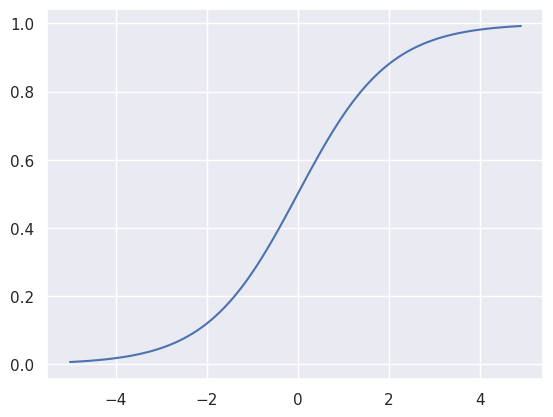

In [4]:
np.random.seed(10)
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

X = np.arange(-5, 5, 0.1)
y = sigmoid(X)
plt.plot(X, y)

In [5]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [9]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [11]:
X = data.data
y = data.target

In [12]:
X.shape

(569, 30)

In [13]:
y.shape

(569,)

In [15]:
df = pd.DataFrame(data = X, columns = data.feature_names)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(426, 30)
(426,)
(143, 30)
(143,)


In [18]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_prob = model.predict_proba(X_test)
y_prob

array([[9.94853929e-01, 5.14607097e-03],
       [1.10967757e-04, 9.99889032e-01],
       [2.71663481e-03, 9.97283365e-01],
       [9.99783146e-01, 2.16853968e-04],
       [3.47297450e-03, 9.96527025e-01],
       [1.37600004e-02, 9.86240000e-01],
       [2.74951824e-04, 9.99725048e-01],
       [9.50781148e-01, 4.92188522e-02],
       [9.99999793e-01, 2.06948483e-07],
       [9.83137280e-01, 1.68627203e-02],
       [1.11605705e-04, 9.99888394e-01],
       [3.40096447e-04, 9.99659904e-01],
       [5.65080207e-01, 4.34919793e-01],
       [1.09355785e-03, 9.98906442e-01],
       [9.99711936e-01, 2.88064237e-04],
       [9.99036047e-01, 9.63952822e-04],
       [8.26933031e-04, 9.99173067e-01],
       [7.28128445e-02, 9.27187156e-01],
       [2.04960322e-02, 9.79503968e-01],
       [9.98237550e-01, 1.76245000e-03],
       [6.78577686e-01, 3.21422314e-01],
       [1.51442416e-01, 8.48557584e-01],
       [3.40547141e-03, 9.96594529e-01],
       [6.38821489e-02, 9.36117851e-01],
       [1.000000

In [20]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0])

Accuracy: 0.9300699300699301


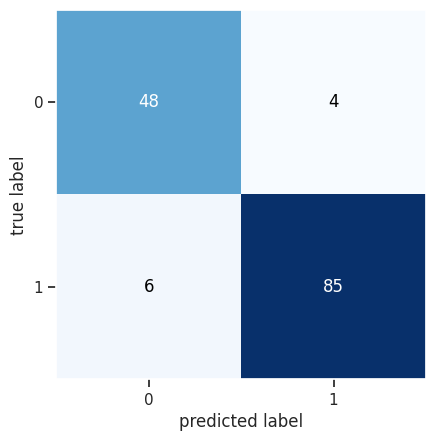

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cm)

acc = accuracy_score(y_test, y_pred)
print(f'Accuracy: {acc}')

In [27]:
def plot_confusion_matrix(cm):
  cm = cm[::-1]
  cm = pd.DataFrame(cm, columns = ['pred_0', 'pred_1'], index = ['true_1', 'true_0'])

  fig = ff.create_annotated_heatmap(z = cm.values, x = list(cm.columns), y = list(cm.index),
                                    colorscale = 'ice', showscale=True, reversescale=True)
  fig.update_layout(width=600,height = 600, title = f'Confusion matrix, Accuracy: {acc:.4f}', font_size=16)
  fig.show()

plot_confusion_matrix(cm)

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.89      0.92      0.91        52
      benign       0.96      0.93      0.94        91

    accuracy                           0.93       143
   macro avg       0.92      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

